## 3D Electric field of a charged wired

We aim to compute the static electric field of a charged wire with total charge $Q$ uniformly distributed along it, whose shape is described by the following parametric curve in space:

$$
    \vec{r'}(t) = (\cos (4t), \, \sin (4t), \, t / 2) \quad \text{for} \quad t \in [0, 4 \pi]
$$

To solve this problem, we'll apply the formula:

$$
    \vec{E}(\vec{r}) = k \, \lambda \int_0^{4 \pi} \frac{\vec{r} - \vec{r'}(t)}{| \vec{r} - \vec{r'}(t) | ^ 3} \left| \frac{d \vec{r'}(t)}{dt} \right| \, dt
$$

Where $k$ is a physical constant and $\lambda$ is the linear charge density of the wire.

In [1]:
# Importing libraries
import sympy as smp 

import numpy as np
from scipy.integrate import quad_vec

import matplotlib.pyplot as plt
from plotly.graph_objects import Cone, Scatter3d, Figure # Interactive plot library

In [2]:
# Constants and variables
Q = smp.symbols('Q', real = True, constant = True, nonzero = True)
k = smp.symbols('k', real = True, positive = True, constant = True)

t = smp.symbols('t', real = True, nonnegative = True)
x, y, z = smp.symbols('x y z', real = True)

In [3]:
# Prime variables
xp = smp.cos(4 * t)
yp = smp.sin(4 * t)
zp = t / 2

# Position of points on the line and derivative of r prime
rp = smp.Matrix([xp, yp, zp])
d_rp_dt = smp.diff(rp, t, 1)
d_rp_dt

Matrix([
[-4*sin(4*t)],
[ 4*cos(4*t)],
[        1/2]])

The total charge on the wire is:

$$
    Q = \int_{wire} dq = \int_{wire} \lambda \, | dr' | = \lambda \, \int_0^{4 \pi} \left| \frac{dr'(t)}{dt} \right| \, dt
$$

Thus:

$$
    \lambda = \frac{Q}{\int_0^{4 \pi} \left| \frac{dr'(t)}{dt} \right| \, dt}
$$

In [4]:
# Linear charge density
lambda_ = Q / smp.integrate(d_rp_dt.norm(), (t, 0, 4 * smp.pi))
lambda_

sqrt(65)*Q/(130*pi)

In [5]:
# Position of points in the space
r = smp.Matrix([x, y, z])

# Integrand function
dEdt = k * (r - rp) / (((r - rp).norm()) ** 3) * (lambda_ * d_rp_dt.norm())
dEdt

Matrix([
[sqrt(65)*Q*k*(x - cos(4*t))*sqrt(16*sin(4*t)**2 + 16*cos(4*t)**2 + 1/4)/(130*pi*((t/2 - z)**2 + (x - cos(4*t))**2 + (y - sin(4*t))**2)**(3/2))],
[sqrt(65)*Q*k*(y - sin(4*t))*sqrt(16*sin(4*t)**2 + 16*cos(4*t)**2 + 1/4)/(130*pi*((t/2 - z)**2 + (x - cos(4*t))**2 + (y - sin(4*t))**2)**(3/2))],
[    sqrt(65)*Q*k*(-t/2 + z)*sqrt(16*sin(4*t)**2 + 16*cos(4*t)**2 + 1/4)/(130*pi*((t/2 - z)**2 + (x - cos(4*t))**2 + (y - sin(4*t))**2)**(3/2))]])

The obtained functions cannot be integrated analitically. We must compute the integrals numerically using SciPy.

In [6]:
# Going numerically
lambdify_list = [t, x, y, z, k, Q]
dEdt = smp.lambdify(lambdify_list, dEdt, 'numpy')

In [7]:
# Creation of the grid
k = 1.0
Q = 1.0 # Positive. Can be negative as well

x = np.linspace(- 3, 3, 11)
z = np.linspace(0, 2 * np.pi, 11)

x, y, z = np.meshgrid(x, x, z)

x = x.flatten()
y = y.flatten()
z = z.flatten()

In [8]:
# Computing numerically the electric field
E = quad_vec(dEdt, 0, 4 * np.pi, args = (x, y, z, k, Q))[0].squeeze() # shape (3, 11^3)
E

array([[-0.02173411, -0.0250765 , -0.02798664, ...,  0.02790348,
         0.02497592,  0.02163515],
       [-0.02195106, -0.02527766, -0.02815356, ...,  0.02804852,
         0.02516016,  0.02184304],
       [-0.01721721, -0.01532568, -0.01242874, ...,  0.01247306,
         0.01533327,  0.01718214]], shape=(3, 1331))

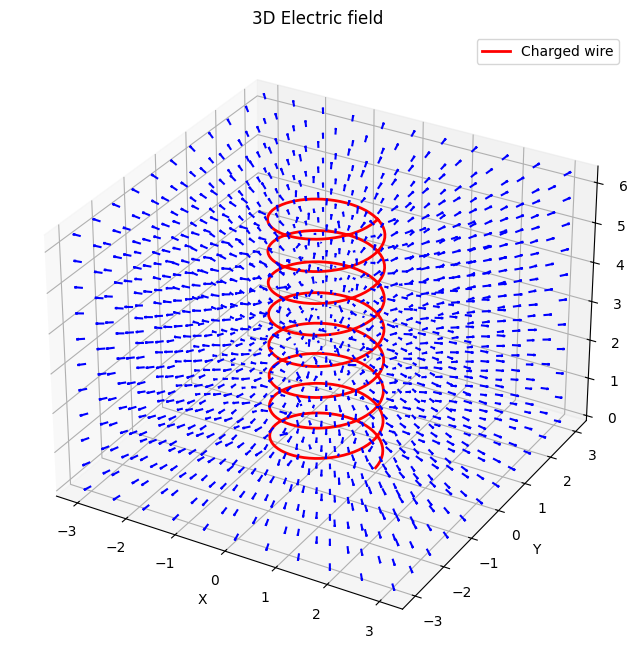

In [9]:
# Basic plot using Matplotlib
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')

quiver = ax.quiver(x, y, z, E[0], E[1], E[2],
                   length = 0.15,
                   normalize = True,
                   color = 'blue')

t_vals = np.linspace(0, 4 * np.pi, 500)  # 500 points from 0 to 4pi
xp = np.vectorize(smp.lambdify(t, xp))(t_vals)
yp = np.vectorize(smp.lambdify(t, yp))(t_vals)
zp = np.vectorize(smp.lambdify(t, zp))(t_vals)

ax.plot(xp, yp, zp, 'r-', linewidth = 2, label = 'Charged wire')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('3D Electric field')

ax.legend()
plt.show()

In [10]:
# Interactive plot using Plotly
vector_field = Cone(x = x, y = y, z = z, u = E[0], v = E[1], w = E[2],
                    sizemode = "absolute",
                    sizeref = 0.25,
                    colorscale = 'Blues',
                    anchor = 'cm',
                    colorbar = dict(title = "Vector Magnitude"))

wire = Scatter3d(x = xp, y = yp, z = zp,
                 mode = 'lines',
                 line = dict(color = 'red', width = 5),
                 name = 'Charged wire')

fig = Figure(data = [vector_field, wire])
fig.update_layout(title = '3D Electric field (interactive)',
                  scene = dict(xaxis_title = 'X',
                               yaxis_title = 'Y',
                               zaxis_title = 'Z',
                               aspectmode = 'auto'),
                  width = 800,
                  height = 800)

fig.show()

Let's start over with another more complex wire, but this time we have a non-uniform distributed charge:

$$
    \vec{r'}(t) = (\cos (3t), \, \sin (2t), \, 2 \sqrt{t}) \quad \text{for} \quad t \in [0, 4 \pi]
$$

In this case, the solution is provided by:

$$
    \vec{E}(\vec{r}) = k \, \int_0^{4 \pi} \frac{\vec{r} - \vec{r'}(t)}{| \vec{r} - \vec{r'}(t) | ^ 3} \lambda (t) \left| \frac{d \vec{r'}(t)}{dt} \right| \, dt
$$


In [11]:
# Constants and variables
k = smp.symbols('k', real = True, positive = True, constant = True)

t = smp.symbols('t', real = True, nonnegative = True)
x, y, z = smp.symbols('x y z', real = True)

# Prime variables
xp = smp.cos(3 * t)
yp = smp.sin(2 * t)
zp = 2 * smp.sqrt(t)

# Position of points on the line and derivative of r prime
rp = smp.Matrix([xp, yp, zp])
d_rp_dt = smp.diff(rp, t, 1)
d_rp_dt

Matrix([
[-3*sin(3*t)],
[ 2*cos(2*t)],
[  1/sqrt(t)]])

Let's define $\lambda(t)$ as:

$$
    \lambda(t) = \frac{t}{2 \pi} - 1
$$

In [12]:
# Linear charge density
lambda_ = (t / (2 * smp.pi) - 1)

# Integrand function to compute Q. too complex, we'll handle the integral numerically
dqdt = lambda_ * (d_rp_dt).norm()

# Position of points in the space
r = smp.Matrix([x, y, z])

# Integrand function
dEdt = k * (r - rp) / (((r - rp).norm()) ** 3) * dqdt

# Going numerically
lambdify_list = [t, x, y, z, k]
dEdt = smp.lambdify(lambdify_list, dEdt, 'numpy')

# Creation of the grid
k = 1.0

x = np.linspace(- 2, 2, 10)
z = np.linspace(0, 2 * np.sqrt(4 * np.pi), 10)

x, y, z = np.meshgrid(x, x, z)

x = x.flatten()
y = y.flatten()
z = z.flatten()

# Computing numerically the electric field
E = quad_vec(dEdt, 0, 4 * np.pi, args = (x, y, z, k))[0].squeeze() # shape (3, 1000)
E

array([[ 0.23400638,  0.30414422,  0.37387078, ...,  0.2785991 ,
         0.50119974,  0.49281867],
       [ 0.25845723,  0.34024902,  0.41799691, ...,  0.31067836,
         0.53834016,  0.54157529],
       [ 0.15255483,  0.11044558,  0.01656709, ..., -0.66850403,
        -0.3816144 , -0.03387654]], shape=(3, 1000))

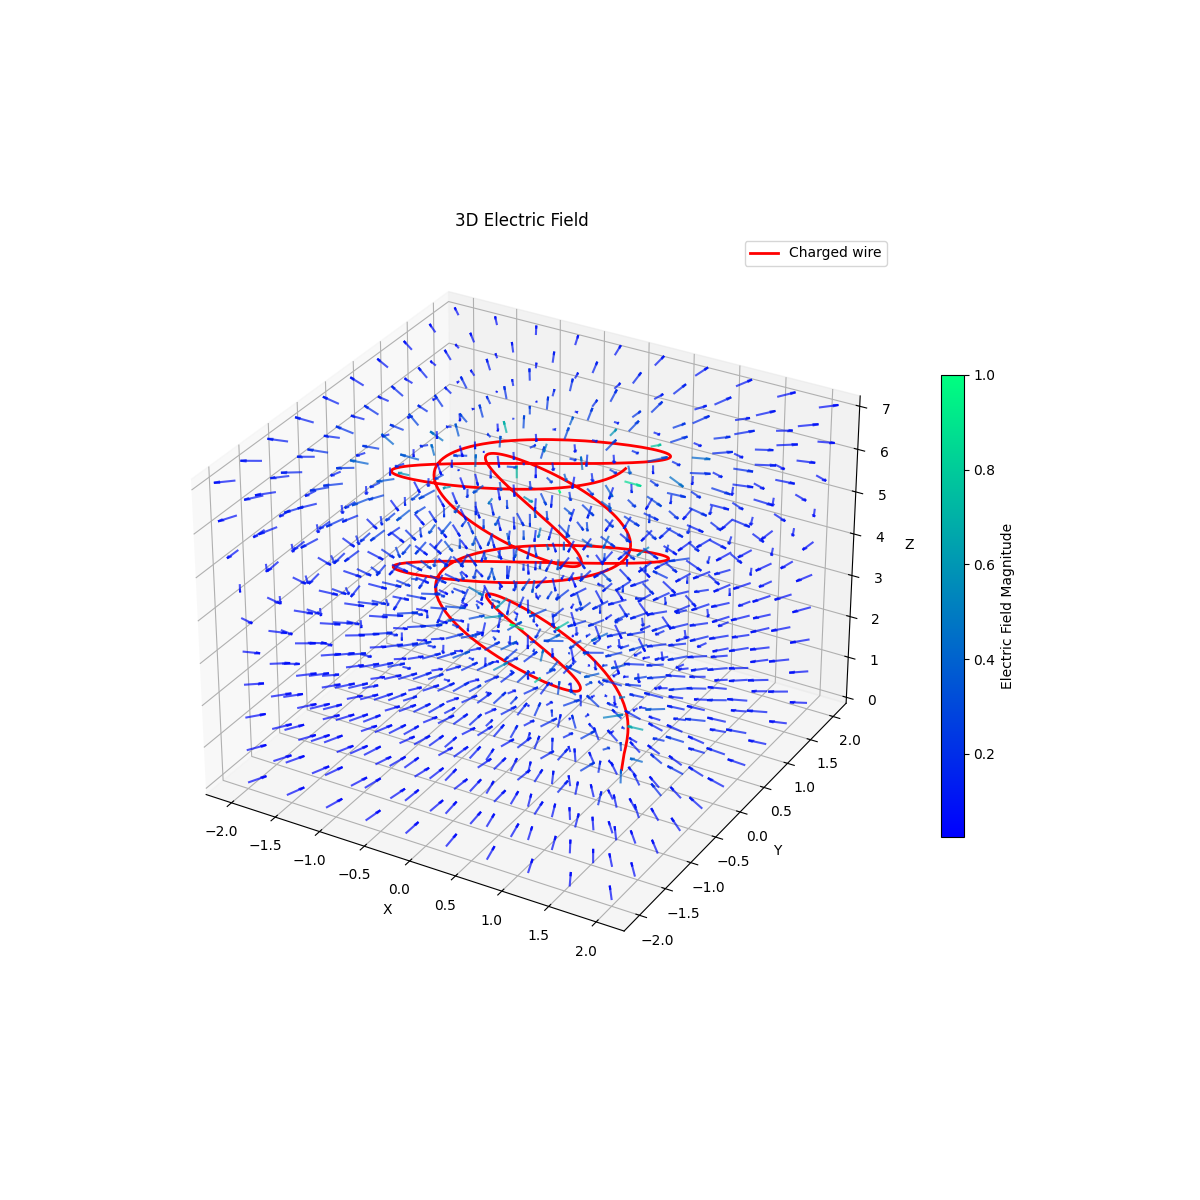

In [13]:
# Interative plot using a magic command
%matplotlib widget

# Compute field magnitude (normalized)
magnitude = np.sqrt(E[0] ** 2 + E[1] ** 2 + E[2] ** 2)
magnitude = magnitude / np.max(magnitude)

# Create figure and 3D axis
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, projection = '3d')

# Create quiver plot with colormap
quiver = ax.quiver(x, y, z, E[0], E[1], E[2],
                   length = 0.2,
                   normalize = True,
                   colors = plt.cm.winter(magnitude),  # Normalize and apply colormap
                   alpha = 0.7)

t_vals = np.linspace(0, 4 * np.pi, 500)
xp = np.vectorize(smp.lambdify(t, xp))(t_vals)
yp = np.vectorize(smp.lambdify(t, yp))(t_vals)
zp = np.vectorize(smp.lambdify(t, zp))(t_vals)

ax.plot(xp, yp, zp, 'r-', linewidth = 2, label = 'Charged wire')

# Add colorbar
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap = plt.cm.winter, 
                                          norm = plt.Normalize(magnitude.min(), 1)),
                                          ax = ax,
                                          shrink = 0.5)

cbar.set_label('Electric Field Magnitude')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Electric Field')

ax.legend()
plt.show()